## Scope of work

The data we are about to use for this beginner data analysis project was provided by a small smartphones and gadgets sales company. Hence our goals are :
- Determine the month with highest sales? 
- Determine the city with highest order?
- When should we engage a marketing campaign to increase sales?
- Determine the product with highest order?


## Data Discovery

In [1]:
#Importation of package

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Diplacing the names of all the files in our dataset
files  =  [file for file in os.listdir(r'C:\Users\H156405\Downloads\Sales_Data\Sales_Data')]

print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [3]:
all_data =pd.DataFrame(columns=['Order ID', 'Product','Quantity Ordered', 'Price Each','Order Date','Purchase Address'])

In [4]:
# combining all data into a single file 
path = r'C:\Users\H156405\Downloads\Sales_Data\Sales_Data'
for file in files:
    current_data = pd.read_csv(f"{path}\{file}") # using string formatting to join the current directory to every file name in the folder
    all_data = pd.concat([all_data , current_data])

In [5]:
all_data.drop_duplicates(inplace = True)

In [6]:
all_data.drop(index=775 , inplace=True)

In [7]:
# SAving combined data in a csv file 
all_data.to_csv(r'C:\Users\H156405\Downloads\Sales_Data\Sales_Data\all_data.csv' , index= False)

In [8]:
# Printing our data  types
all_data.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

 All the data are of object type. Which doesn't make sense because we have Order ID , quantity ordered  which should be features with numerical types and order date which should be of datetype. This will be corrected in the following steps.


In [9]:
# Checking for missing values in our data set 
all_data.isna().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

The step above shows we have 1 missing input for each features of our dataset.

In [10]:
# viewing the missing values 
all_data.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
11681,False,False,False,False,False,False
11682,False,False,False,False,False,False
11683,False,False,False,False,False,False
11684,False,False,False,False,False,False


In [11]:
# Displacing the shape of our data set 
all_data.shape

(185676, 6)

Our data set has 6 features and 185676 records. 

In [12]:
(all_data.isnull().sum()/all_data.shape[0])*100

Order ID            0.000539
Product             0.000539
Quantity Ordered    0.000539
Price Each          0.000539
Order Date          0.000539
Purchase Address    0.000539
dtype: float64

The above step shows that we have 0.000539% of missing inputs in our records , therefore it's not harmful to delete all the records with missing values 

In [13]:
# Dropping records with missing values 
all_data = all_data.dropna(how='all')
all_data.shape

(185675, 6)

We are now left with 185675 records which is still and good number for the analysis 

In [14]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [16]:
all_data['Order ID'].unique()

array([176558., 176559., 176560., ..., 259355., 259356., 259357.])

In [17]:
all_data['Order ID'] = all_data['Order ID'].apply(lambda x: int(x) )

In [18]:
all_data['Price Each'].unique()

array([  11.95,   99.99,  600.  ,   11.99, 1700.  ,   14.95,  389.99,
          3.84,  150.  ,    2.99,  700.  ,  300.  ,  149.99,  109.99,
        999.99,  400.  ,  379.99])

In [19]:
all_data['Price Each'] = all_data['Price Each'].apply(lambda x: float(x) )

In [20]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(np.int8)

In [21]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [22]:
all_data.dtypes

Order ID                     int64
Product                     object
Quantity Ordered              int8
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [23]:
all_data['sales'] = all_data['Quantity Ordered']*all_data['Price Each']

In [24]:
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",11.95


In [25]:
all_data.max().to_frame()

,0
Order ID,319670
Product,iPhone
Quantity Ordered,9
Price Each,1700.0
Order Date,2020-01-01 05:13:00
Purchase Address,"999 Wilson St, San Francisco, CA 94016"
sales,3400.0


The highest sale was on January 1st 2020 , with a sales of $3400  and 9 orders of iphones in 999 Wilson St, San Francisco , CA 94016

In [26]:
#break the date in month to have the month with higher sales 
all_data['Month'] = all_data['Order Date'].apply(lambda x:str(x).split('-')[1])

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,04
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,04
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,04
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,04
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,04


In [28]:
all_data.groupby('Month')['sales'].sum()

Month
01    1.821113e+06
02    2.200066e+06
03    2.804958e+06
04    3.389212e+06
05    3.150604e+06
06    2.576268e+06
07    2.646461e+06
08    2.240383e+06
09    2.094086e+06
10    3.734766e+06
11    3.197725e+06
12    4.608292e+06
Name: sales, dtype: float64

From this execution above , we can observe we did the highest sales of around 4.61 Millions in the month of December.

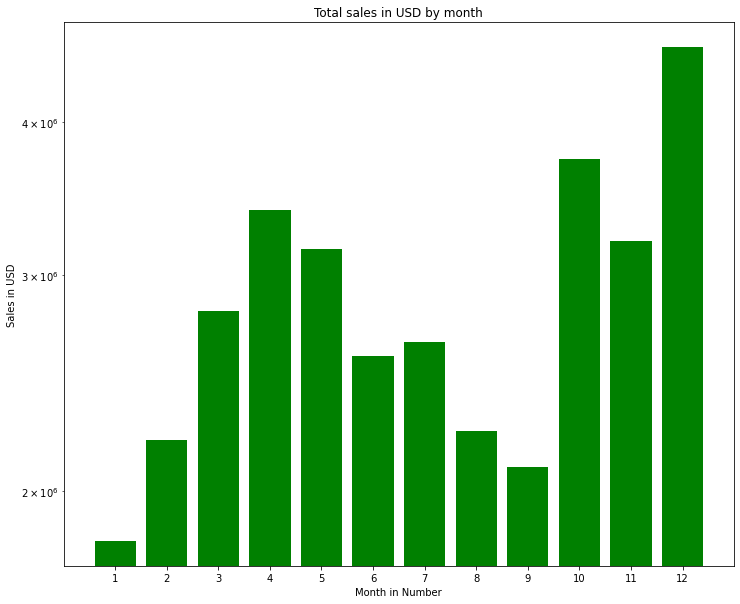

In [29]:
# let's plot these data on a bar graph 
Month =range(1,13)
plt.figure(figsize=(12,10))
plt.bar( Month, all_data.groupby('Month')['sales'].sum(),color='g',log=True)
plt.xticks(Month)
plt.xlabel('Month in Number')
plt.ylabel('Sales in USD')
plt.title('Total sales in USD by month')
plt.show()

In [30]:
#Extracting the cities from the addresses
all_data['City'] = all_data['Purchase Address'].apply(lambda x:x.split(',')[1].strip())
all_data['City'].to_frame()

,City
0,Dallas
1,Boston
2,Los Angeles
3,Los Angeles
4,Los Angeles
...,...
11681,Los Angeles
11682,San Francisco
11683,San Francisco
11684,San Francisco


In [31]:
# let's get the city with highest order 
all_data.groupby('City')['Quantity Ordered'].sum()

City
Atlanta          16584.0
Austin           11137.0
Boston           22490.0
Dallas           16707.0
Los Angeles      33246.0
New York City    27902.0
Portland         14035.0
San Francisco    50165.0
Seattle          16534.0
Name: Quantity Ordered, dtype: float64

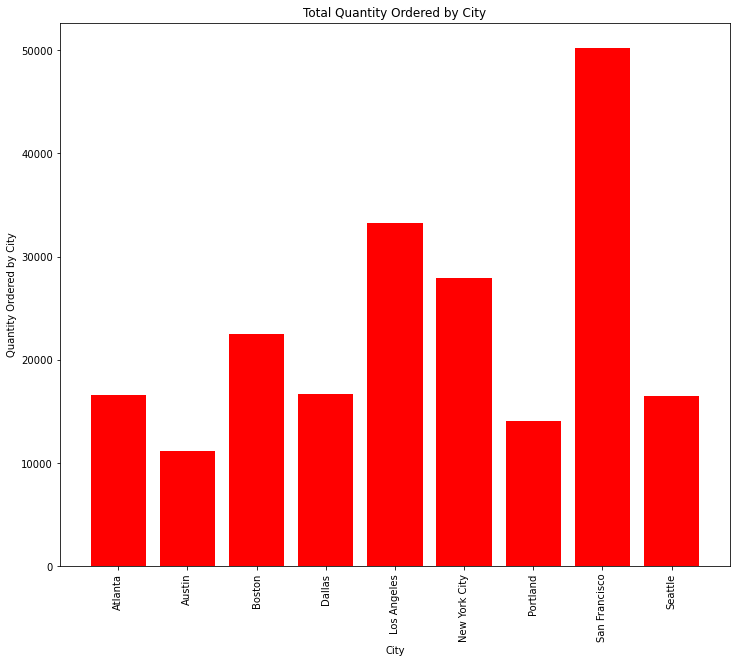

In [32]:
City =all_data['City'].unique()
plt.figure(figsize=(12,10))
plt.bar( all_data.groupby('City')['Quantity Ordered'].sum().index, all_data.groupby('City')['Quantity Ordered'].sum(),color='r',log=False)
plt.xticks(City, rotation='vertical')
plt.xlabel('City')
plt.ylabel('Quantity Ordered by City')
plt.title('Total Quantity Ordered by City')
plt.show()

 The city of **San Francisco** has the highest total quantity ordered in 2020 with **50165** products orders.


In [33]:
#let's get the number of orders per city 

all_data.groupby('City')['Quantity Ordered'].count()

City
Atlanta          14863
Austin            9890
Boston           19898
Dallas           14797
Los Angeles      29563
New York City    24846
Portland         12447
San Francisco    44658
Seattle          14713
Name: Quantity Ordered, dtype: int64

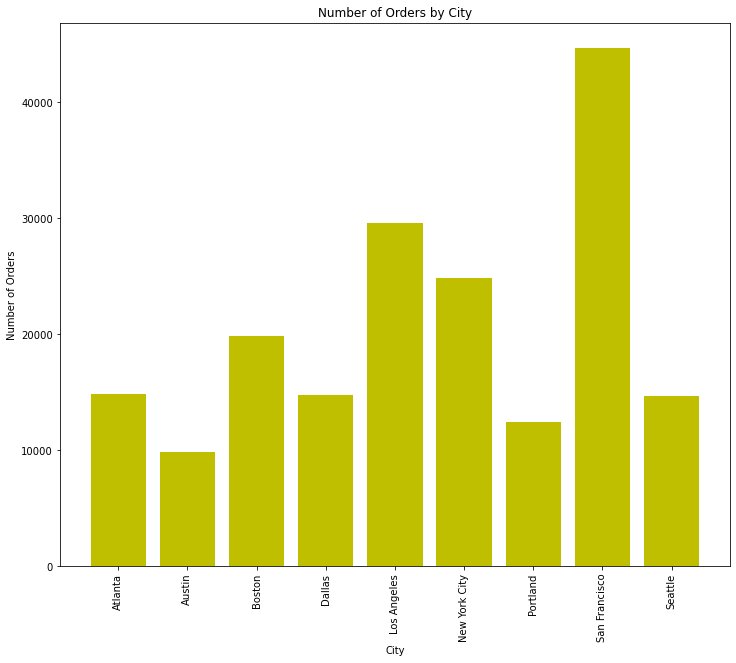

In [34]:
plt.figure(figsize=(12,10))
plt.bar( all_data.groupby('City')['Quantity Ordered'].count().index, all_data.groupby('City')['Quantity Ordered'].count(),color='y',log=False)
plt.xticks(City, rotation='vertical')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by City')
plt.show()

The city of **San Francisco** has the highest number of  orders in 2020 with **44658** orders.

In [35]:
#let's get the product with highest order
# We can break in down by cities and by month

# By city
for city in City:
    Quantity_ordered_bycity = all_data[all_data['City']==city].groupby('Product')['Quantity Ordered'].sum()
    #print(Quantity_ordered_bycity)
    #print(Quantity_ordered_bycity.idxmax())
    print(f'Most product ordered is {Quantity_ordered_bycity.idxmax()}in the city of {city} with {Quantity_ordered_bycity.max()} orders')


Most product ordered is AAA Batteries (4-pack)in the city of Dallas with 2500.0 orders
Most product ordered is AAA Batteries (4-pack)in the city of Boston with 3456.0 orders
Most product ordered is AAA Batteries (4-pack)in the city of Los Angeles with 4958.0 orders
Most product ordered is AAA Batteries (4-pack)in the city of San Francisco with 7404.0 orders
Most product ordered is AAA Batteries (4-pack)in the city of Seattle with 2443.0 orders
Most product ordered is AAA Batteries (4-pack)in the city of Atlanta with 2358.0 orders
Most product ordered is AAA Batteries (4-pack)in the city of New York City with 4119.0 orders
Most product ordered is AAA Batteries (4-pack)in the city of Portland with 2078.0 orders
Most product ordered is AAA Batteries (4-pack)in the city of Austin with 1668.0 orders


We can realize that **AAA Batteries (4-pack)** are mostly ordered in all cities of the USA, this makes some sense since this product is a day to day product.

In [36]:
#let's break it by month now
for month in all_data['Month'].unique():
    Quantity_ordered_bymonth = all_data[all_data['Month']==month].groupby('Product')['Quantity Ordered'].sum()
    #print(Quantity_ordered_bymonth)
    #print(Quantity_ordered_bycity.idxmax())
    print(f'Most product ordered is {Quantity_ordered_bymonth.idxmax()}in the month of {month} with {Quantity_ordered_bymonth.max()} orders')



Most product ordered is AAA Batteries (4-pack)in the month of 04 with 2934.0 orders
Most product ordered is AAA Batteries (4-pack)in the month of 05 with 2923.0 orders
Most product ordered is AAA Batteries (4-pack)in the month of 08 with 2019.0 orders
Most product ordered is AAA Batteries (4-pack)in the month of 09 with 1922.0 orders
Most product ordered is AAA Batteries (4-pack)in the month of 12 with 4238.0 orders
Most product ordered is AAA Batteries (4-pack)in the month of 01 with 1600.0 orders
Most product ordered is AAA Batteries (4-pack)in the month of 02 with 1971.0 orders
Most product ordered is AAA Batteries (4-pack)in the month of 03 with 2477.0 orders
Most product ordered is AAA Batteries (4-pack)in the month of 07 with 2361.0 orders
Most product ordered is AAA Batteries (4-pack)in the month of 06 with 2161.0 orders
Most product ordered is AAA Batteries (4-pack)in the month of 11 with 3021.0 orders
Most product ordered is AAA Batteries (4-pack)in the month of 10 with 3357.0

We can still observe that the **AAA Batteries (4-pack)** is the still the best product ordered by month.

In [37]:
#Let's get the product with the best sales per month
for month in all_data['Month'].unique():
    Sales_bymonth = all_data[all_data['Month']==month].groupby('Product')['sales'].sum()
    #print(Sales_bymonth)
    #print(Sales_bycity.idxmax())
    print(f'Most product ordered is {Sales_bymonth.idxmax()} in the month of {month} with ${Sales_bymonth.max()} sales')



Most product ordered is Macbook Pro Laptop in the month of 04 with $771800.0 sales
Most product ordered is Macbook Pro Laptop in the month of 05 with $788800.0 sales
Most product ordered is Macbook Pro Laptop in the month of 08 with $506600.0 sales
Most product ordered is Macbook Pro Laptop in the month of 09 with $487900.0 sales
Most product ordered is Macbook Pro Laptop in the month of 12 with $1093100.0 sales
Most product ordered is Macbook Pro Laptop in the month of 01 with $399500.0 sales
Most product ordered is Macbook Pro Laptop in the month of 02 with $469200.0 sales
Most product ordered is Macbook Pro Laptop in the month of 03 with $644300.0 sales
Most product ordered is Macbook Pro Laptop in the month of 07 with $625600.0 sales
Most product ordered is Macbook Pro Laptop in the month of 06 with $605200.0 sales
Most product ordered is Macbook Pro Laptop in the month of 11 with $748000.0 sales
Most product ordered is Macbook Pro Laptop in the month of 10 with $892500.0 sales


In [38]:
#Let's get the product with the best sales per month
for city in City:
    Sales_bycity = all_data[all_data['City']==city].groupby('Product')['sales'].sum()
    #print(Sales_bymonth)
    #print(Sales_bycity.idxmax())
    print(f'Most product ordered is {Sales_bycity.idxmax()} in the city of {city} with ${Sales_bycity.max()} sales')



Most product ordered is Macbook Pro Laptop in the city of Dallas with $647700.0 sales
Most product ordered is Macbook Pro Laptop in the city of Boston with $814300.0 sales
Most product ordered is Macbook Pro Laptop in the city of Los Angeles with $1275000.0 sales
Most product ordered is Macbook Pro Laptop in the city of San Francisco with $1929500.0 sales
Most product ordered is Macbook Pro Laptop in the city of Seattle with $605200.0 sales
Most product ordered is Macbook Pro Laptop in the city of Atlanta with $644300.0 sales
Most product ordered is Macbook Pro Laptop in the city of New York City with $1116900.0 sales
Most product ordered is Macbook Pro Laptop in the city of Portland with $572900.0 sales
Most product ordered is Macbook Pro Laptop in the city of Austin with $426700.0 sales


### When can we intitiate a marketing campaign in order to increase sales?

In [39]:
all_data['Hours'] = all_data['Order Date'].dt.hour

In [40]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,Month,City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,04,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,09,Los Angeles,20
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,09,San Francisco,16
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,09,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,09,San Francisco,17


In [41]:
all_data.groupby('Hours').head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,Month,City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,04,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
1187,177687,Wired Headphones,1,11.99,2019-04-01 04:12:00,"23 Meadow St, San Francisco, CA 94016",11.99,04,San Francisco,4
1340,177831,Lightning Charging Cable,1,14.95,2019-04-01 03:09:00,"914 6th St, San Francisco, CA 94016",14.95,04,San Francisco,3
1417,177906,Google Phone,1,600.00,2019-04-15 04:59:00,"876 Wilson St, New York City, NY 10001",600.00,04,New York City,4
1595,178077,ThinkPad Laptop,1,999.99,2019-04-06 03:09:00,"771 14th St, San Francisco, CA 94016",999.99,04,San Francisco,3


In [42]:
keys = []
hours = []
for key, hour in all_data.groupby('Hours'):
    keys.append(key)
    hours.append(len(hour))
display(keys , hours)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

[3902,
 2347,
 1242,
 830,
 852,
 1320,
 2481,
 4000,
 6252,
 8740,
 10928,
 12392,
 12572,
 12115,
 10965,
 10159,
 10357,
 10883,
 12263,
 12886,
 12215,
 10904,
 8808,
 6262]

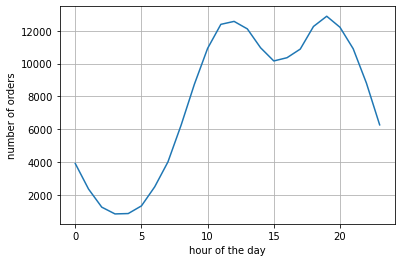

In [43]:
plt.grid()
plt.plot(keys,hours)
plt.xlabel('hour of the day')
plt.ylabel('number of orders')
plt.show()

We can observe that the sales number increases from 10:00 AM to 03:00 PM due to breaks period then from 04:00 PM to 08:00 PM certainly after working hours and home duties.In sum the right timing for a marketing campaign should be between 07:00 AM to 10:00 PM.

### Mostly sold product ?

In [44]:
all_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4126.0
27in 4K Gaming Monitor         6239.0
27in FHD Monitor               7540.0
34in Ultrawide Monitor         6191.0
AA Batteries (4-pack)         27614.0
AAA Batteries (4-pack)        30984.0
Apple Airpods Headphones      15637.0
Bose SoundSport Headphones    13430.0
Flatscreen TV                  4812.0
Google Phone                   5529.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23168.0
Macbook Pro Laptop             4725.0
ThinkPad Laptop                4128.0
USB-C Charging Cable          23927.0
Vareebadd Phone                2068.0
Wired Headphones              20524.0
iPhone                         6846.0
Name: Quantity Ordered, dtype: float64

<AxesSubplot:xlabel='Product'>

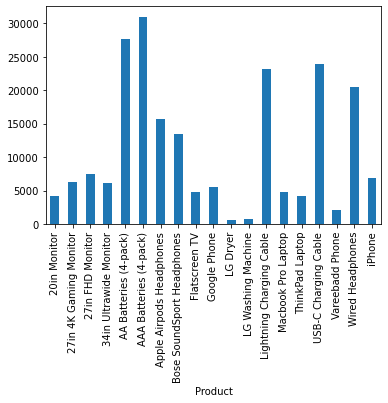

In [45]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [46]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [47]:
products = all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = all_data.groupby('Product')['Quantity Ordered'].sum() 
prices = all_data.groupby('Product')['Price Each'].mean()
sales = all_data.groupby('Product')['sales'].mean()

<ipython-input-48-39874b87678c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


<Figure size 7200x3600 with 0 Axes>

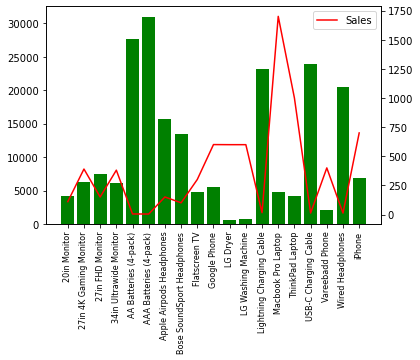

In [48]:
plt.figure(figsize=(100,50))
fig, ax1= plt.subplots()
ax2 =ax1.twinx()
ax1.bar(products, quantity , color='g')
ax2.plot(products, sales,'r-')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.legend('Quantities')
plt.legend(['Sales'])
plt.show()

Most products sold are Batteries , Apple Airports headphones , lighting charging cable , USB-C Charging cable and Wired Headphones but the products with high sales are Google phone , LG washing Machine, Macbook Pro Laptop , ThinkPad Laptops and iphones

## Combinations of products which are most sold

In [49]:
df4 = all_data.groupby('Order ID')['Order ID','Product']

<ipython-input-49-680453bb6fbb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4 = all_data.groupby('Order ID')['Order ID','Product']


In [50]:
all_data['Order ID']

0        176558
1        176559
2        176560
3        176560
4        176561
          ...  
11681    259353
11682    259354
11683    259355
11684    259356
11685    259357
Name: Order ID, Length: 185675, dtype: int64

In [51]:
df4.head()

,Order ID,Product
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,Google Phone
3,176560,Wired Headphones
4,176561,Wired Headphones
...,...,...
11681,259353,AAA Batteries (4-pack)
11682,259354,iPhone
11683,259355,iPhone
11684,259356,34in Ultrawide Monitor


In [52]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,Month,City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,04,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles,9


In [53]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [54]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185675 entries, 0 to 11685
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185675 non-null  int64         
 1   Product           185675 non-null  object        
 2   Quantity Ordered  185675 non-null  int8          
 3   Price Each        185675 non-null  float64       
 4   Order Date        185675 non-null  datetime64[ns]
 5   Purchase Address  185675 non-null  object        
 6   sales             185675 non-null  float64       
 7   Month             185675 non-null  object        
 8   City              185675 non-null  object        
 9   Hours             185675 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), int8(1), object(4)
memory usage: 14.3+ MB


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14128 entries, 2 to 11678
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          14128 non-null  int64         
 1   Product           14128 non-null  object        
 2   Quantity Ordered  14128 non-null  int8          
 3   Price Each        14128 non-null  float64       
 4   Order Date        14128 non-null  datetime64[ns]
 5   Purchase Address  14128 non-null  object        
 6   sales             14128 non-null  float64       
 7   Month             14128 non-null  object        
 8   City              14128 non-null  object        
 9   Hours             14128 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), int8(1), object(4)
memory usage: 1.1+ MB


In [56]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,Month,City,Hours
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles,14
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,04,Los Angeles,19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,04,Los Angeles,19
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,04,San Francisco,17


In [58]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

<ipython-input-58-0b35994e80a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [59]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,Month,City,Hours,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles,14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles,14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,04,Los Angeles,19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,04,Los Angeles,19,"Google Phone,USB-C Charging Cable"
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,04,San Francisco,17,"AAA Batteries (4-pack),Google Phone"


In [60]:
df2 = df.drop_duplicates(subset='Order ID')

In [61]:
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,Month,City,Hours,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles,14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,04,Los Angeles,19,"Google Phone,USB-C Charging Cable"
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,04,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",14.95,04,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",150.00,04,Seattle,10,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...,...
11597,259277,iPhone,1,700.00,2019-09-28 13:07:00,"795 Willow St, New York City, NY 10001",700.00,09,New York City,13,"iPhone,Wired Headphones"
11619,259297,iPhone,1,700.00,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",700.00,09,Boston,18,"iPhone,Lightning Charging Cable"
11627,259303,34in Ultrawide Monitor,1,379.99,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",379.99,09,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,09,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"


In [62]:
df2['Grouped'].value_counts()[0:5]

iPhone,Lightning Charging Cable         886
Google Phone,USB-C Charging Cable       857
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Grouped, dtype: int64

<AxesSubplot:ylabel='Grouped'>

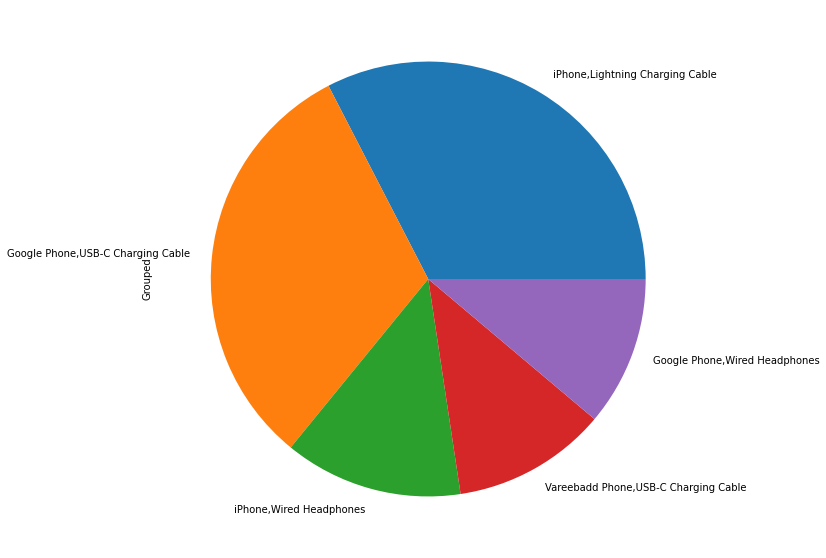

In [63]:
df2['Grouped'].value_counts()[0:5].plot.pie(y='mass', figsize=(10, 10))

The pie Chart Above represent the proportion of highly sold combined products in a single order. Most Buyers are interested by these products.